# Introduction to neural network classification with 

In this notebook we're going to learn how to write neural networks for classification problems

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


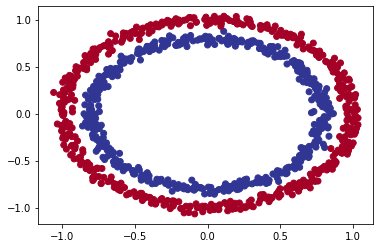

In [5]:
# Visualize with the plot
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
# View the first examples of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [9]:
import tensorflow as tf

In [10]:
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model.fit(X_train, 
                    y_train, 
                    epochs=200)

Epoch 1/200
25/25 [==============================] - 3s 9ms/step - loss: 0.7287 - accuracy: 0.4988
Epoch 2/200
25/25 [==============================] - 1s 21ms/step - loss: 0.7180 - accuracy: 0.4900
Epoch 3/200
25/25 [==============================] - 0s 6ms/step - loss: 0.7125 - accuracy: 0.4812
Epoch 4/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7090 - accuracy: 0.4812
Epoch 5/200
25/25 [==============================] - 0s 7ms/step - loss: 0.7069 - accuracy: 0.4762
Epoch 6/200
25/25 [==============================] - 0s 10ms/step - loss: 0.7055 - accuracy: 0.3862
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 0.7038 - accuracy: 0.3450
Epoch 8/200
25/25 [==============================] - 0s 10ms/step - loss: 0.7029 - accuracy: 0.3787
Epoch 9/200
25/25 [==============================] - 0s 13ms/step - loss: 0.7018 - accuracy: 0.3862
Epoch 10/200
25/25 [==============================] - 0s 8ms/step - loss: 0.7008 - accuracy: 0.3825
Epoch

In [12]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 1.0000


[0.05733496695756912, 1.0]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add mroe layres or increase the number of hidden units within a layer
2. Compiling a model - here we might choose a different optimization function such as Adam instead of SGD
3. Fitting a model - perhaps we might fit our model for more epochs

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(tf.constant(X, dtype=tf.float32), 
            tf.constant(y, dtype=tf.float32),
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7045 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6889 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6862 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6830 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6759 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5040
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6664 - accuracy: 0.5350
Epoch 10/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6596 - accuracy: 0.5530
Epoch 11/

To visualize our model's predictions, let's create a function `plot_decision_boundary()` this function will:

* Take in a trained model, features and labels
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls)

In [14]:
import numpy as np
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multiclass
  if len(y_pred[0]) > 1:
    print("doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


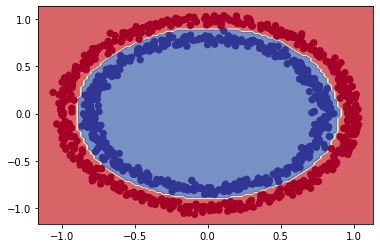

In [15]:
# Check out the predictions our model is making
plot_decision_boundary(model_2, X, y)

## The missing piece - non linearity

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.1368 - accuracy: 0.4890
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1187 - accuracy: 0.4890
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1156 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1114 - accuracy: 0.4890
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1105 - accuracy: 0.4880
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1095 - accuracy: 0.4880
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1090 - accuracy: 0.4870
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1084 - accuracy: 0.4870
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0997 - accuracy: 0.4880
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.0900 - accuracy: 0.4890
Epoch 11/

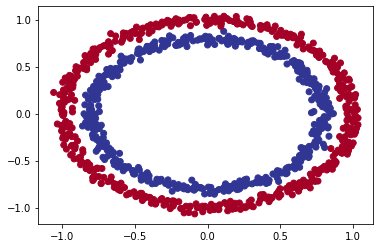

In [17]:
# Check out data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


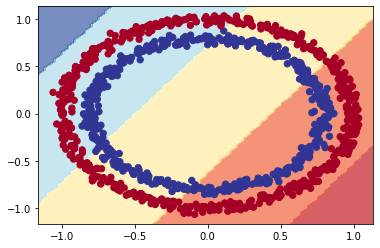

In [18]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's build our first neural network with a non linear activation function

In [19]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
model_5.fit(tf.constant(X, dtype=tf.float32),
            tf.constant(y, dtype=tf.float32),
            epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9674 - accuracy: 0.4820
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9633 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9599 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9576 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9250 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8789 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8531 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8218 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8221 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7846 - accuracy: 0.4790
Epoch 11/

In [20]:
#  Time to replicate the multi-layer neural network from tensorflow playground in code

# Set random seed
tf.random.set_seed(42)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(tf.constant(X, dtype=tf.float32),
                      tf.constant(y, dtype=tf.float32),
                      epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.3632 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 3.4465 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 2.0765 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3010 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.2039 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1351 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0783 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0296 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9887 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9525 - accuracy: 0.5000
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


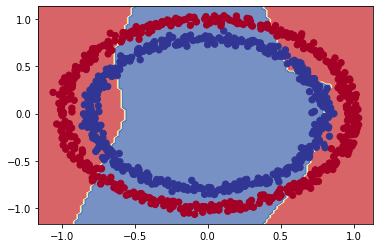

In [21]:
plot_decision_boundary(model_6, X, y)

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=10)

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(tf.constant(X, dtype=tf.float32),
                      tf.constant(y, dtype=tf.float32),
                      callbacks=[callback],
                      epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6998 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.4930
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5170
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5580
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5240
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6828 - accuracy: 0.5230
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5250
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5280
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


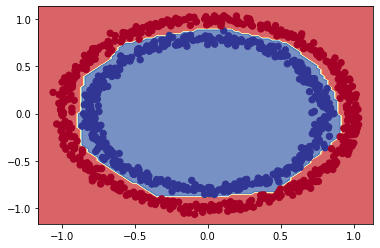

In [23]:
plot_decision_boundary(model_7, X, y)

In [24]:
# Evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 1.0000


[0.022111164405941963, 1.0]

Now we've discussed the concept of linear and non-linear functions, let's see them in action

In [25]:
# Create a toy tensor (simnilar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

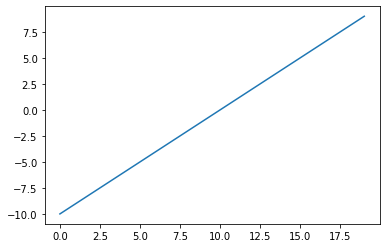

In [26]:
# Visualize our toy tensor
plt.plot(A);

In [27]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

In [28]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

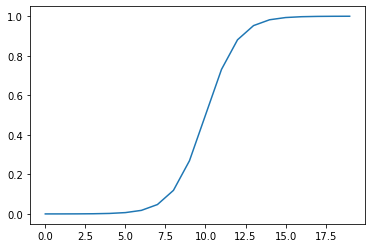

In [29]:
# Plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [30]:
# Replicate relu activation function
def relu(x):
  return tf.maximum(0, x)

In [31]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

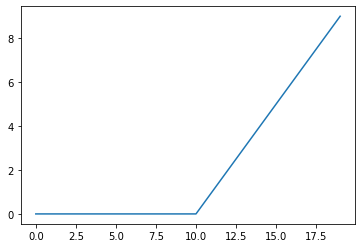

In [32]:
# Lets plot A passed through relu function
plt.plot(relu(A));

In [33]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

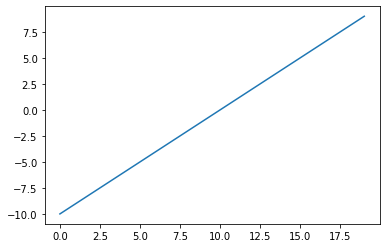

In [34]:
plt.plot(tf.keras.activations.linear(A));

In [35]:
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification problem

So far we've been training and testing on teh same dataset

However, in machine learning this is basically a sin

So let's create a training and test set

In [36]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [37]:
# Let's recreate a model to fit on the training data and evaluate on the test set

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

# Create callback
callback = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(tf.constant(X_train, dtype=tf.float32),
                      tf.constant(y_train, dtype=tf.float32),
                      callbacks=[callback],
                      epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6910 - accuracy: 0.5113
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5200
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6894 - accuracy: 0.5213
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.5225
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6878 - accuracy: 0.5263
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.5213
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5263
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5312
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5275
Epoch 10/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.5312
Epoch 11/

In [38]:
# Evaluate on training data
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 1.0000


[0.009143197908997536, 1.0]

In [39]:
# Evaluate on test data
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9900


[0.023280464112758636, 0.9900000095367432]

313/313 [==============================] - 1s 1ms/step
doing binary classification


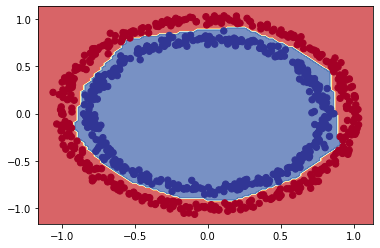

In [40]:
# Plot the decision boundaries for training set
plot_decision_boundary(model_8, 
                       X_train,
                       y_train)

313/313 [==============================] - 0s 1ms/step
doing binary classification


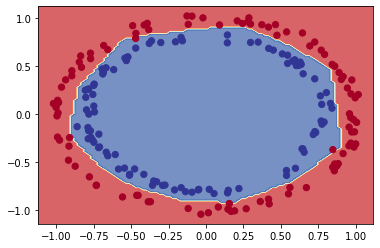

In [41]:
# Plot the decision boundaries for test set
plot_decision_boundary(model_8, 
                       X_test,
                       y_test)

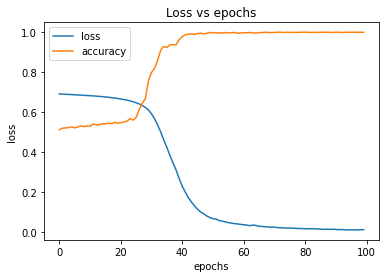

In [42]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Loss vs epochs")
plt.legend();

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model *while* its training
* Another model (we could use the same one as above, but we're practicing building models here.
* A modified loss curves plot

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch / 20))
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss", patience=10)

# Fit the model
history = model_9.fit(tf.constant(X_train, dtype=tf.float32),
                      tf.constant(y_train, dtype=tf.float32),
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6988 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4875 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6976 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6970 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6965 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6962 - accuracy: 0.4913 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

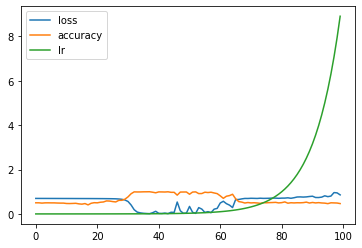

In [44]:
pd.DataFrame(history.history).plot()
plt.legend()

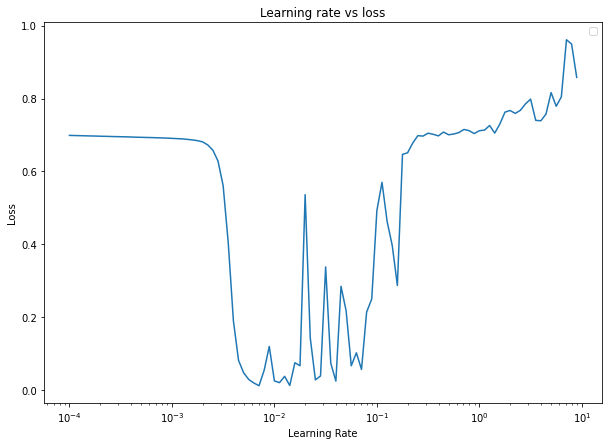

In [45]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/ 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs loss")
plt.legend();

In [47]:
# Let's try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(9, activation="relu"),
    tf.keras.layers.Dense(7, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model
history_10 = model_10.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6949 - accuracy: 0.4888
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.4938
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4925
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4963
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5013
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.4725
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5575
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.6000
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6893 - accuracy: 0.5950
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6112
Epoch 11/

313/313 [==============================] - 2s 4ms/step
doing binary classification


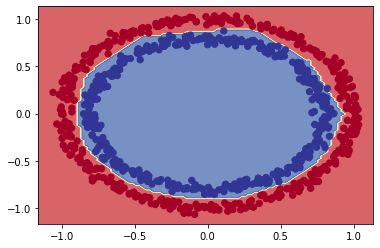

In [48]:
plot_decision_boundary(model_10, X_train, y_train)

313/313 [==============================] - 0s 1ms/step
doing binary classification


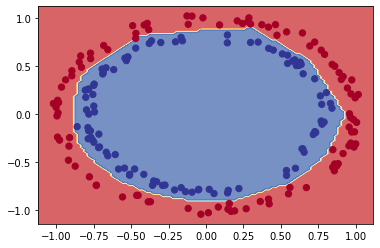

In [51]:
plot_decision_boundary(model_10, X_test, y_test)

In [50]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9950


[0.010945365764200687, 0.9950000047683716]

## More classification evaluation methods

Alongside visualizing our models results there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion-matrix
* Classification report (from scikit-learn)

In [52]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}")

7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 0.9950
Model loss on the test set: 0.010945365764200687
Model accuracy on the test set: 99.50


Confusion matrix

In [56]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test) # in prediction probability form

# Create confusion matrix
# confusion_matrix(y_test, y_preds)

7/7 [==============================] - 0s 2ms/step


Prediction array has come out in **prediction probability** form.. the standard ouput from the sigmoid (or softmax) activation functions

In [57]:
# Convert our prediction probabilities to binary format and view first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [58]:
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

Prettifying our confusion matrix

In [60]:
# Note: the confusion matrix code we're about to write a remix of scikit-learn function and our code

import itertools

figsize = (10, 10)

# Create the consufion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it 
fig, ax = plt.subplotys(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

AttributeError: ignored